# 基本

## 参考

* [理系学生のためのSymPy入門編【研究で使うPython #69】](https://www.youtube.com/watch?v=cjCv9JCqHag)
* [SymPyの使い方](https://gochikika.ntt.com/Features/SymPy.html)

## ライブラリ

* SymPy
    * 代数計算(記号(文字)を記号として扱う計算)ができる
    * [Python（SymPy）によるベクトル解析その２（勾配・発散・回転）](https://pianofisica.hatenablog.com/entry/2021/04/26/190000)
    * [sympy: Symbol( ), symbols( ), var( )使い分け](https://qiita.com/asobinin_kinsan/items/6f008ed667d80fc3a9b7)
        * varはトップレベルで使う
        * 関数内ではsymbolsを使う

## ライブラリの読み込み

In [1]:
import sympy as sp
import math
from sympy.core.function import Function

## SymPyの基本

### 平方根を記号のまま出力

In [2]:
### 通常は計算した結果が出る
math.sqrt(2)

1.4142135623730951

In [2]:
### SymPyを使うと記号のまま出してくれる
sp.sqrt(8)

2*sqrt(2)

### 記号xを作成

In [3]:
x = sp.Symbol('x')

In [4]:
### 記号xを出力
x

x

### 出力について

In [5]:
### printだとLaTeXの形にならないのでdisplayを使う
print(x)
display(x)

x


x

### 分数

In [10]:
display(sp.Rational(2,3))

### 分母
display(sp.denom(sp.Rational(2,3)))

### 分子
display(sp.numer(sp.Rational(2,3)))

2/3

3

2

### その他

In [14]:
### 階乗
display(sp.factorial(3))

### 円周率
display(sp.pi)

### ネイピア数
display(sp.E)

### 無限大
display(sp.oo)

6

pi

E

oo

### 代数計算

In [6]:
### 記号のまま計算できる
display(x+x)
display(x*x)

2*x

x**2

### 複数の記号の作成

In [18]:
### symbolsを使う
x, y = sp.symbols('x y')

In [8]:
x**2 + 2*y

x**2 + 2*y

In [9]:
### varでも可能(グローバル変数的に使う場合はコッチを使う？)
a, b, c = sp.var('a b c')

In [10]:
a**2 + 2*b + c

a**2 + 2*b + c

### 関数の利用

In [11]:
sp.sin(x)

sin(x)

In [12]:
### 「sp.」の後でTabを押すと使える関数一覧が出る
#sp.Abs(x)
sp.log(x)

log(x)

### 新しい変数に式を代入

In [13]:
c = a + b
display(c)
display(c**2)

a + b

(a + b)**2

### 展開と因数分解

In [14]:
expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
display(expr)

### 因数分解
expr1 = sp.factor(expr)
display(expr1)

### 展開
expr2 = sp.expand(expr1)
display(expr2)

x**3 + 3*x**2*y + 3*x*y**2 + y**3

(x + y)**3

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [24]:
### 虚数まで含めた因数分解

expr = x**2 + 4

### 虚数含めない
display(sp.factor(expr))

### 虚数含める
display(sp.factor(expr, extension=[sp.I]))


x**2 + 4

(x - 2*I)*(x + 2*I)

### 簡単化

In [15]:
a, b, c = sp.var('a b c')

expr3 = (a*b + a*c) / a

display(expr3)

### 約分
display(sp.simplify(expr3))

(a*b + a*c)/a

b + c

### 代入

In [16]:
x, y, a = sp.var('x y a')

y = x**2
display(y)

x**2

In [17]:
### xに値を代入
display(y.subs(x, 3))
display(y.subs(x, a))

9

a**2

### 微分

In [18]:
x, y = sp.var('x y')

### y = x^2の微分
y = x**2
display(sp.diff(y, x))

### cos(x)の微分
display(sp.diff(sp.cos(x), x))

2*x

-sin(x)

### 方程式を解く

In [19]:
x = sp.Symbol('x')
f = x**2 - 3*x + 2
display(f)
display(sp.factor(f))

### f(x) = 0 となるxを見つける
display(sp.solve(f))

x**2 - 3*x + 2

(x - 2)*(x - 1)

[1, 2]

In [74]:
### 連立方程式を解く
x, y = sp.var('x y')

expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12

display(sp.solve((expr1,expr2)))

{x: 24/5, y: -6/5}

In [83]:
x, a, b, c = sp.var('x a b c')

f = a*x**2 + b*x + c
display(f)
display(sp.solve(f, x)[0])
display(sp.solve(f, x)[1])

a*x**2 + b*x + c

(-b - sqrt(-4*a*c + b**2))/(2*a)

(-b + sqrt(-4*a*c + b**2))/(2*a)

## 行列

* numpyとの違い
    * 文字をそのまま扱える
    * 分数は分数として処理できる

### 行列の生成

In [20]:
sp.Matrix([[1,2], [3,4], [5,6]])

Matrix([
[1, 2],
[3, 4],
[5, 6]])

In [21]:
a, b, c, d, e, f = sp.symbols('a b c d e f')
sp.Matrix([[a,b], [c,d], [e,f]])

Matrix([
[a, b],
[c, d],
[e, f]])

In [22]:
### aに1を入れる
sp.Matrix([[a,b], [c,d], [e,f]]).subs(a, 1)

Matrix([
[1, b],
[c, d],
[e, f]])

In [23]:
### 3行2列であることを宣言して一つのリストに値を入れて行列を生成
display(sp.Matrix(3, 2, [1, 2, 3, 4, 5, 6]))

### 2行3列であることを宣言して一つのリストに値を入れて行列を生成
display(sp.Matrix(2, 3, [1, 2, 3, 4, 5, 6]))


Matrix([
[1, 2],
[3, 4],
[5, 6]])

Matrix([
[1, 2, 3],
[4, 5, 6]])

### 列ベクトル ($ n \times 1 $ 行列)

In [12]:
### リストを入れる
display(sp.Matrix([1, 2, 3, 4]))

Matrix([
[1],
[2],
[3],
[4]])

### 行ベクトル ($ 1 \times n $ 行列)

In [14]:
## リストを二重にする
display(sp.Matrix([[1, 2, 3, 4]]))

Matrix([[1, 2, 3, 4]])

### 転置

In [20]:
### 「.T」をつける。またはtranspose()
display(sp.Matrix([[1, 2, 3, 4]]).T)

Matrix([
[1],
[2],
[3],
[4]])

### 行列の変数への格納と演算

In [69]:
A1 = sp.Matrix(2, 2, [1, 2, 3, 4])
B1 = sp.Matrix(2, 2, [5, 6, 7, 8])
C1 = sp.Matrix(2, 2, [3, 1, 2, 4])

display(A1)
display(B1)
display(C1)

sp.var('a11, a12, a21, a22, b11, b12, b21, b22, c11, c12, c13, c21, c22, c23, c31, c32, c33')
A = sp.Matrix(2, 2, [a11, a12, a21, a22])
B = sp.Matrix(2, 2, [b11, b12, b21, b22])
C = sp.Matrix(3, 3, [c11, c12, c13, c21, c22, c23, c31, c32, c33])

display(A)
display(B)
display(C)

Matrix([
[1, 2],
[3, 4]])

Matrix([
[5, 6],
[7, 8]])

Matrix([
[3, 1],
[2, 4]])

Matrix([
[a11, a12],
[a21, a22]])

Matrix([
[b11, b12],
[b21, b22]])

Matrix([
[c11, c12, c13],
[c21, c22, c23],
[c31, c32, c33]])

In [61]:
display(A1 + B1)
k = sp.Symbol('k')
display(k*B1)

Matrix([
[ 6,  8],
[10, 12]])

Matrix([
[5*k, 6*k],
[7*k, 8*k]])

In [51]:
display(A * B)
### numpyの場合はdot()関数でやらないと行列の積が求められない

Matrix([
[a11*b11 + a12*b21, a11*b12 + a12*b22],
[a21*b11 + a22*b21, a21*b12 + a22*b22]])

### 行列式

In [53]:
display(A)
display(sp.det(A))
display(C)
display(sp.det(C))

Matrix([
[a11, a12],
[a21, a22]])

a11*a22 - a12*a21

Matrix([
[c11, c12, c13],
[c21, c22, c23],
[c31, c32, c33]])

c11*c22*c33 - c11*c23*c32 - c12*c21*c33 + c12*c23*c31 + c13*c21*c32 - c13*c22*c31

### 逆行列

In [65]:
display(A)
display(A.inv())

Matrix([
[a11, a12],
[a21, a22]])

Matrix([
[ a22/(a11*a22 - a12*a21), -a12/(a11*a22 - a12*a21)],
[-a21/(a11*a22 - a12*a21),  a11/(a11*a22 - a12*a21)]])

### 固有値と固有ベクトル

In [70]:
display(C1)
### 固有値5で重複度1、固有値2で重複度1
display(C1.eigenvals())
print('--------------------')
display(C1.eigenvects())

Matrix([
[3, 1],
[2, 4]])

{5: 1, 2: 1}

--------------------


[(2,
  1,
  [Matrix([
   [-1],
   [ 1]])]),
 (5,
  1,
  [Matrix([
   [1/2],
   [  1]])])]

In [75]:
### 固有値2の固有ベクトル
display(C1.eigenvects()[0][2][0])
### 固有値5の固有ベクトル
display(C1.eigenvects()[1][2][0])

Matrix([
[-1],
[ 1]])

Matrix([
[1/2],
[  1]])

## 虚数

### 基本

In [16]:
display(sp.I)
display(sp.I * sp.I)

print('-------')

z = 3 + 4*sp.I
display(z)
### 実部
display(sp.re(z))
### 虚部
display(sp.im(z))
### 共役複素数
display(sp.conjugate(z))
### 絶対値
display(sp.Abs(z))

I

-1

-------


3 + 4*I

3

4

3 - 4*I

5

### 複素数の代数計算

In [5]:
sp.var('z', complex=True)

display(z)
display(sp.conjugate(z))

### 実部と虚部を分けて表示
display(sp.expand_complex(z))
display(sp.conjugate(sp.expand_complex(z)))

### 計算
display(sp.I)
display(sp.conjugate(sp.I))

display(sp.I*z)
display(sp.conjugate(sp.I*z))

display(z**2+sp.I*z)
display(sp.conjugate(z**2+sp.I*z))


z

conjugate(z)

re(z) + I*im(z)

re(z) - I*im(z)

I

-I

I*z

-I*conjugate(z)

z**2 + I*z

conjugate(z)**2 - I*conjugate(z)

### 基本定理の確認

In [44]:
# https://ictsr4.com/py/m0231.html
sp.var('alpha beta',complex=True)
display(sp.conjugate(alpha+beta))
display(sp.conjugate(alpha*beta))
display(sp.conjugate(alpha/beta))
display(sp.conjugate(sp.conjugate(alpha)))
display(sp.expand_complex((alpha+sp.conjugate(alpha))/2))
display(sp.expand_complex((alpha-sp.conjugate(alpha))/(2*sp.I)))

conjugate(alpha) + conjugate(beta)

conjugate(alpha)*conjugate(beta)

conjugate(alpha)/conjugate(beta)

alpha

re(alpha)

im(alpha)

## 色々

### オイラーの公式

In [31]:
display(sp.cos(x)+sp.sin(x)*sp.I)
display((sp.cos(x)+sp.sin(x)*sp.I).simplify())

#式の形で表記 (sp.Eq(A, B)   #=> A = B )
sp.Eq((sp.cos(x)+sp.sin(x)*sp.I).simplify(), sp.cos(x)+sp.sin(x)*sp.I)

I*sin(x) + cos(x)

exp(I*x)

Eq(exp(I*x), I*sin(x) + cos(x))

## 高階導関数

In [29]:
sp.diff(sp.sin(x), x, 2)

### sin(x)をxで2階微分
sp.Eq(sp.Derivative(sp.sin(x), x, 2), 
   sp.diff(sp.sin(x), x, 2))

Eq(Derivative(sin(x), (x, 2)), -sin(x))

### テイラー展開

In [47]:
### 
#f = sp.exp(x)
display(sp.Eq(sp.exp(x), sp.series(sp.exp(x), x, 0, 6)))
display(sp.Eq(sp.sin(x), sp.series(sp.sin(x), x, 0, 6)))
display(sp.Eq(sp.cos(x), sp.series(sp.cos(x), x, 0, 6)))

print(" オイラーの公式 ")
display(sp.Eq(sp.exp(sp.I*x), sp.series(sp.exp(sp.I*x), x, 0, 6)))
display(sp.Eq(sp.cos(x)+sp.sin(x)*sp.I, sp.series(sp.cos(x)+sp.sin(x)*sp.I, x, 0, 6)))

Eq(exp(x), 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6))

Eq(sin(x), x - x**3/6 + x**5/120 + O(x**6))

Eq(cos(x), 1 - x**2/2 + x**4/24 + O(x**6))

 オイラーの公式 


Eq(exp(I*x), 1 + I*x - x**2/2 - I*x**3/6 + x**4/24 + I*x**5/120 + O(x**6))

Eq(I*sin(x) + cos(x), 1 + I*x - x**2/2 - I*x**3/6 + x**4/24 + I*x**5/120 + O(x**6))

In [68]:
#display(sp.Eq(sp.log(x), sp.series(sp.log(x), x, 0, 6)))
#sp.series(sp.log(x), x, 0, 6)
#sp.series(sp.I*x, x, 0, 6)

display(sp.Eq(sp.exp(x), sp.series(sp.exp(x), x, 0, 6)))
display(sp.Eq(sp.exp(x), sp.series(sp.exp(x), x, 1, 6)))
display(sp.Eq(sp.exp(x), sp.series(sp.exp(x), x, 2, 6)))


Eq(exp(x), 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6))

Eq(exp(x), E + E*(x - 1) + E*(x - 1)**2/2 + E*(x - 1)**3/6 + E*(x - 1)**4/24 + E*(x - 1)**5/120 + O((x - 1)**6, (x, 1)))

Eq(exp(x), exp(2) + (x - 2)*exp(2) + (x - 2)**2*exp(2)/2 + (x - 2)**3*exp(2)/6 + (x - 2)**4*exp(2)/24 + (x - 2)**5*exp(2)/120 + O((x - 2)**6, (x, 2)))

In [71]:
display(sp.Eq(sp.cos(x), sp.series(sp.cos(x), x, 0, 6)))
display(sp.Eq(sp.cos(x), sp.series(sp.cos(x), x, 1, 6)))
display(sp.Eq(sp.cos(x), sp.series(sp.cos(x), x, 2, 6)))
display(sp.Eq(sp.cos(x), sp.series(sp.cos(x), x, sp.pi/2, 6)))
display(sp.Eq(sp.cos(x), sp.series(sp.cos(x), x, sp.pi, 6)))

Eq(cos(x), 1 - x**2/2 + x**4/24 + O(x**6))

Eq(cos(x), cos(1) - (x - 1)*sin(1) - (x - 1)**2*cos(1)/2 + (x - 1)**3*sin(1)/6 + (x - 1)**4*cos(1)/24 - (x - 1)**5*sin(1)/120 + O((x - 1)**6, (x, 1)))

Eq(cos(x), cos(2) - (x - 2)*sin(2) - (x - 2)**2*cos(2)/2 + (x - 2)**3*sin(2)/6 + (x - 2)**4*cos(2)/24 - (x - 2)**5*sin(2)/120 + O((x - 2)**6, (x, 2)))

Eq(cos(x), pi/2 + (x - pi/2)**3/6 - (x - pi/2)**5/120 - x + O((x - pi/2)**6, (x, pi/2)))

Eq(cos(x), -1 + (x - pi)**2/2 - (x - pi)**4/24 + O((x - pi)**6, (x, pi)))

In [72]:
display(sp.Eq(sp.sin(x), sp.series(sp.sin(x), x, 0, 6)))
display(sp.Eq(sp.sin(x), sp.series(sp.sin(x), x, 1, 6)))
display(sp.Eq(sp.sin(x), sp.series(sp.sin(x), x, 2, 6)))
display(sp.Eq(sp.sin(x), sp.series(sp.sin(x), x, sp.pi/2, 6)))
display(sp.Eq(sp.sin(x), sp.series(sp.sin(x), x, sp.pi, 6)))

Eq(sin(x), x - x**3/6 + x**5/120 + O(x**6))

Eq(sin(x), sin(1) + (x - 1)*cos(1) - (x - 1)**2*sin(1)/2 - (x - 1)**3*cos(1)/6 + (x - 1)**4*sin(1)/24 + (x - 1)**5*cos(1)/120 + O((x - 1)**6, (x, 1)))

Eq(sin(x), sin(2) + (x - 2)*cos(2) - (x - 2)**2*sin(2)/2 - (x - 2)**3*cos(2)/6 + (x - 2)**4*sin(2)/24 + (x - 2)**5*cos(2)/120 + O((x - 2)**6, (x, 2)))

Eq(sin(x), 1 - (x - pi/2)**2/2 + (x - pi/2)**4/24 + O((x - pi/2)**6, (x, pi/2)))

Eq(sin(x), pi + (x - pi)**3/6 - (x - pi)**5/120 - x + O((x - pi)**6, (x, pi)))

### 階乗

In [76]:
display(sp.factorial(x))
display(sp.factorial(4))

factorial(x)

24

In [80]:
# https://home.hirosaki-u.ac.jp/relativity/%E7%90%86%E5%B7%A5%E7%B3%BB%E3%81%AE%E6%95%B0%E5%AD%A6b/sympy-%E3%81%A7%E7%90%86%E5%B7%A5%E7%B3%BB%E3%81%AE%E6%95%B0%E5%AD%A6b/sympy-%E3%81%A7%E3%83%86%E3%82%A4%E3%83%A9%E3%83%BC%E5%B1%95%E9%96%8B%E3%83%BB%E3%82%AA%E3%82%A4%E3%83%A9%E3%83%BC%E3%81%AE%E5%85%AC%E5%BC%8F/
sp.summation(1/sp.factorial(k), (k, 0, 10))

9864101/3628800

In [79]:
sp.var('k')

sp.Eq(sp.Sum(1/sp.factorial(k), (k, 0, 10)), 
   sp.Sum(1/sp.factorial(k), (k, 0, 10)).doit())

Eq(Sum(1/factorial(k), (k, 0, 10)), 9864101/3628800)

In [84]:
float(sp.summation(1/sp.factorial(k), (k, 0, 10)))

2.7182818011463845

In [85]:
float(sp.E)

2.718281828459045

## 図を描画

[SymPy でテイラー展開・オイラーの公式](https://home.hirosaki-u.ac.jp/relativity/%E7%90%86%E5%B7%A5%E7%B3%BB%E3%81%AE%E6%95%B0%E5%AD%A6b/sympy-%E3%81%A7%E7%90%86%E5%B7%A5%E7%B3%BB%E3%81%AE%E6%95%B0%E5%AD%A6b/sympy-%E3%81%A7%E3%83%86%E3%82%A4%E3%83%A9%E3%83%BC%E5%B1%95%E9%96%8B%E3%83%BB%E3%82%AA%E3%82%A4%E3%83%A9%E3%83%BC%E3%81%AE%E5%85%AC%E5%BC%8F)


In [87]:
# SymPy Plotting Backends (SPB): グラフを描く際に利用
from spb import *

# グラフを SVG で Notebook にインライン表示
%config InlineBackend.figure_formats = ['svg']

In [88]:
expt1 = sp.series(sp.exp(x), x, 0, 2).removeO()
expt2 = sp.series(sp.exp(x), x, 0, 3).removeO()
expt3 = sp.series(sp.exp(x), x, 0, 4).removeO()
expt1, expt2, expt3

(x + 1, x**2/2 + x + 1, x**3/6 + x**2/2 + x + 1)

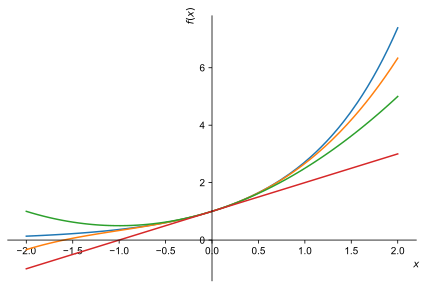

In [92]:
sp.plot(sp.exp(x), expt3, expt2, expt1, (x, -2, 2));

In [95]:
expt1 = sp.series(sp.exp(x), x, 1, 2).removeO()
expt2 = sp.series(sp.exp(x), x, 1, 3).removeO()
expt3 = sp.series(sp.exp(x), x, 1, 4).removeO()
expt1, expt2, expt3

(E*(x - 1) + E,
 E*(x - 1)**2/2 + E*(x - 1) + E,
 E*(x - 1)**3/6 + E*(x - 1)**2/2 + E*(x - 1) + E)

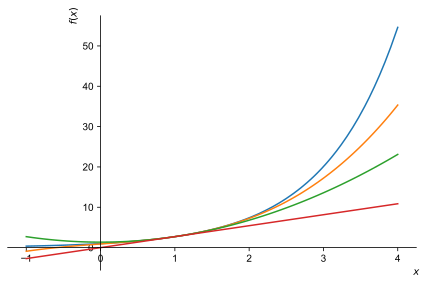

In [101]:
sp.plot(sp.exp(x), expt3, expt2, expt1, (x, -1, 4));

In [102]:
expt1 = sp.series(sp.exp(x), x, 2, 2).removeO()
expt2 = sp.series(sp.exp(x), x, 2, 3).removeO()
expt3 = sp.series(sp.exp(x), x, 2, 4).removeO()
expt1, expt2, expt3

((x - 2)*exp(2) + exp(2),
 (x - 2)**2*exp(2)/2 + (x - 2)*exp(2) + exp(2),
 (x - 2)**3*exp(2)/6 + (x - 2)**2*exp(2)/2 + (x - 2)*exp(2) + exp(2))

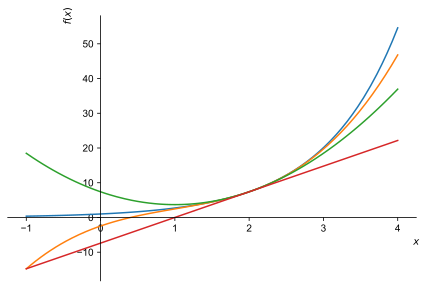

In [103]:
sp.plot(sp.exp(x), expt3, expt2, expt1, (x, -1, 4));

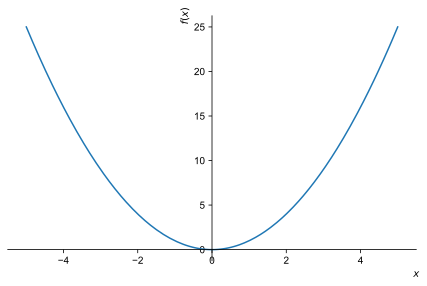

In [94]:
sp.plot(x**2, (x, -5, 5));